# Using Ultralytics Yolo v10

https://docs.ultralytics.com/modes/train/

https://docs.ultralytics.com/modes/train/#usage-examples

https://docs.ultralytics.com/models/yolov10/

https://colab.research.google.com/drive/1BI0VRt1lCrigNgnhLb9COHjg5Ajy-wco#scrollTo=LyopYpK1TQrB

https://blog.roboflow.com/yolov10-how-to-train/?utm_campaign=Newsletter+-+6%2F6%2F2024+-+%5Byolov10%5D&utm_content=Newsletter+-+6%2F6%2F2024+-+%5Byolov10%5D&utm_medium=email_action&utm_source=email





In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 10.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO

In [ ]:
!nvidia-smi

Fri Jun 14 14:39:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Load a pretrained YOLOv10n model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 159MB/s]


In [ ]:


# Perform object detection on an image
results = model("/content/1.1_test.jpg")

# Display the results
results[0].show()


image 1/1 /content/1.1_test.jpg: 576x640 1 clock, 68.9ms
Speed: 13.4ms preprocess, 68.9ms inference, 807.2ms postprocess per image at shape (1, 3, 576, 640)


In [ ]:
%cd /content/

!yolo task=detect mode=predict conf=0.25 save=True \
model=yolov8n.pt \
source=/content/1.1_test.jpg

/content
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/1.1_test.jpg: 576x640 1 clock, 80.1ms
Speed: 5.8ms preprocess, 80.1ms inference, 530.0ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


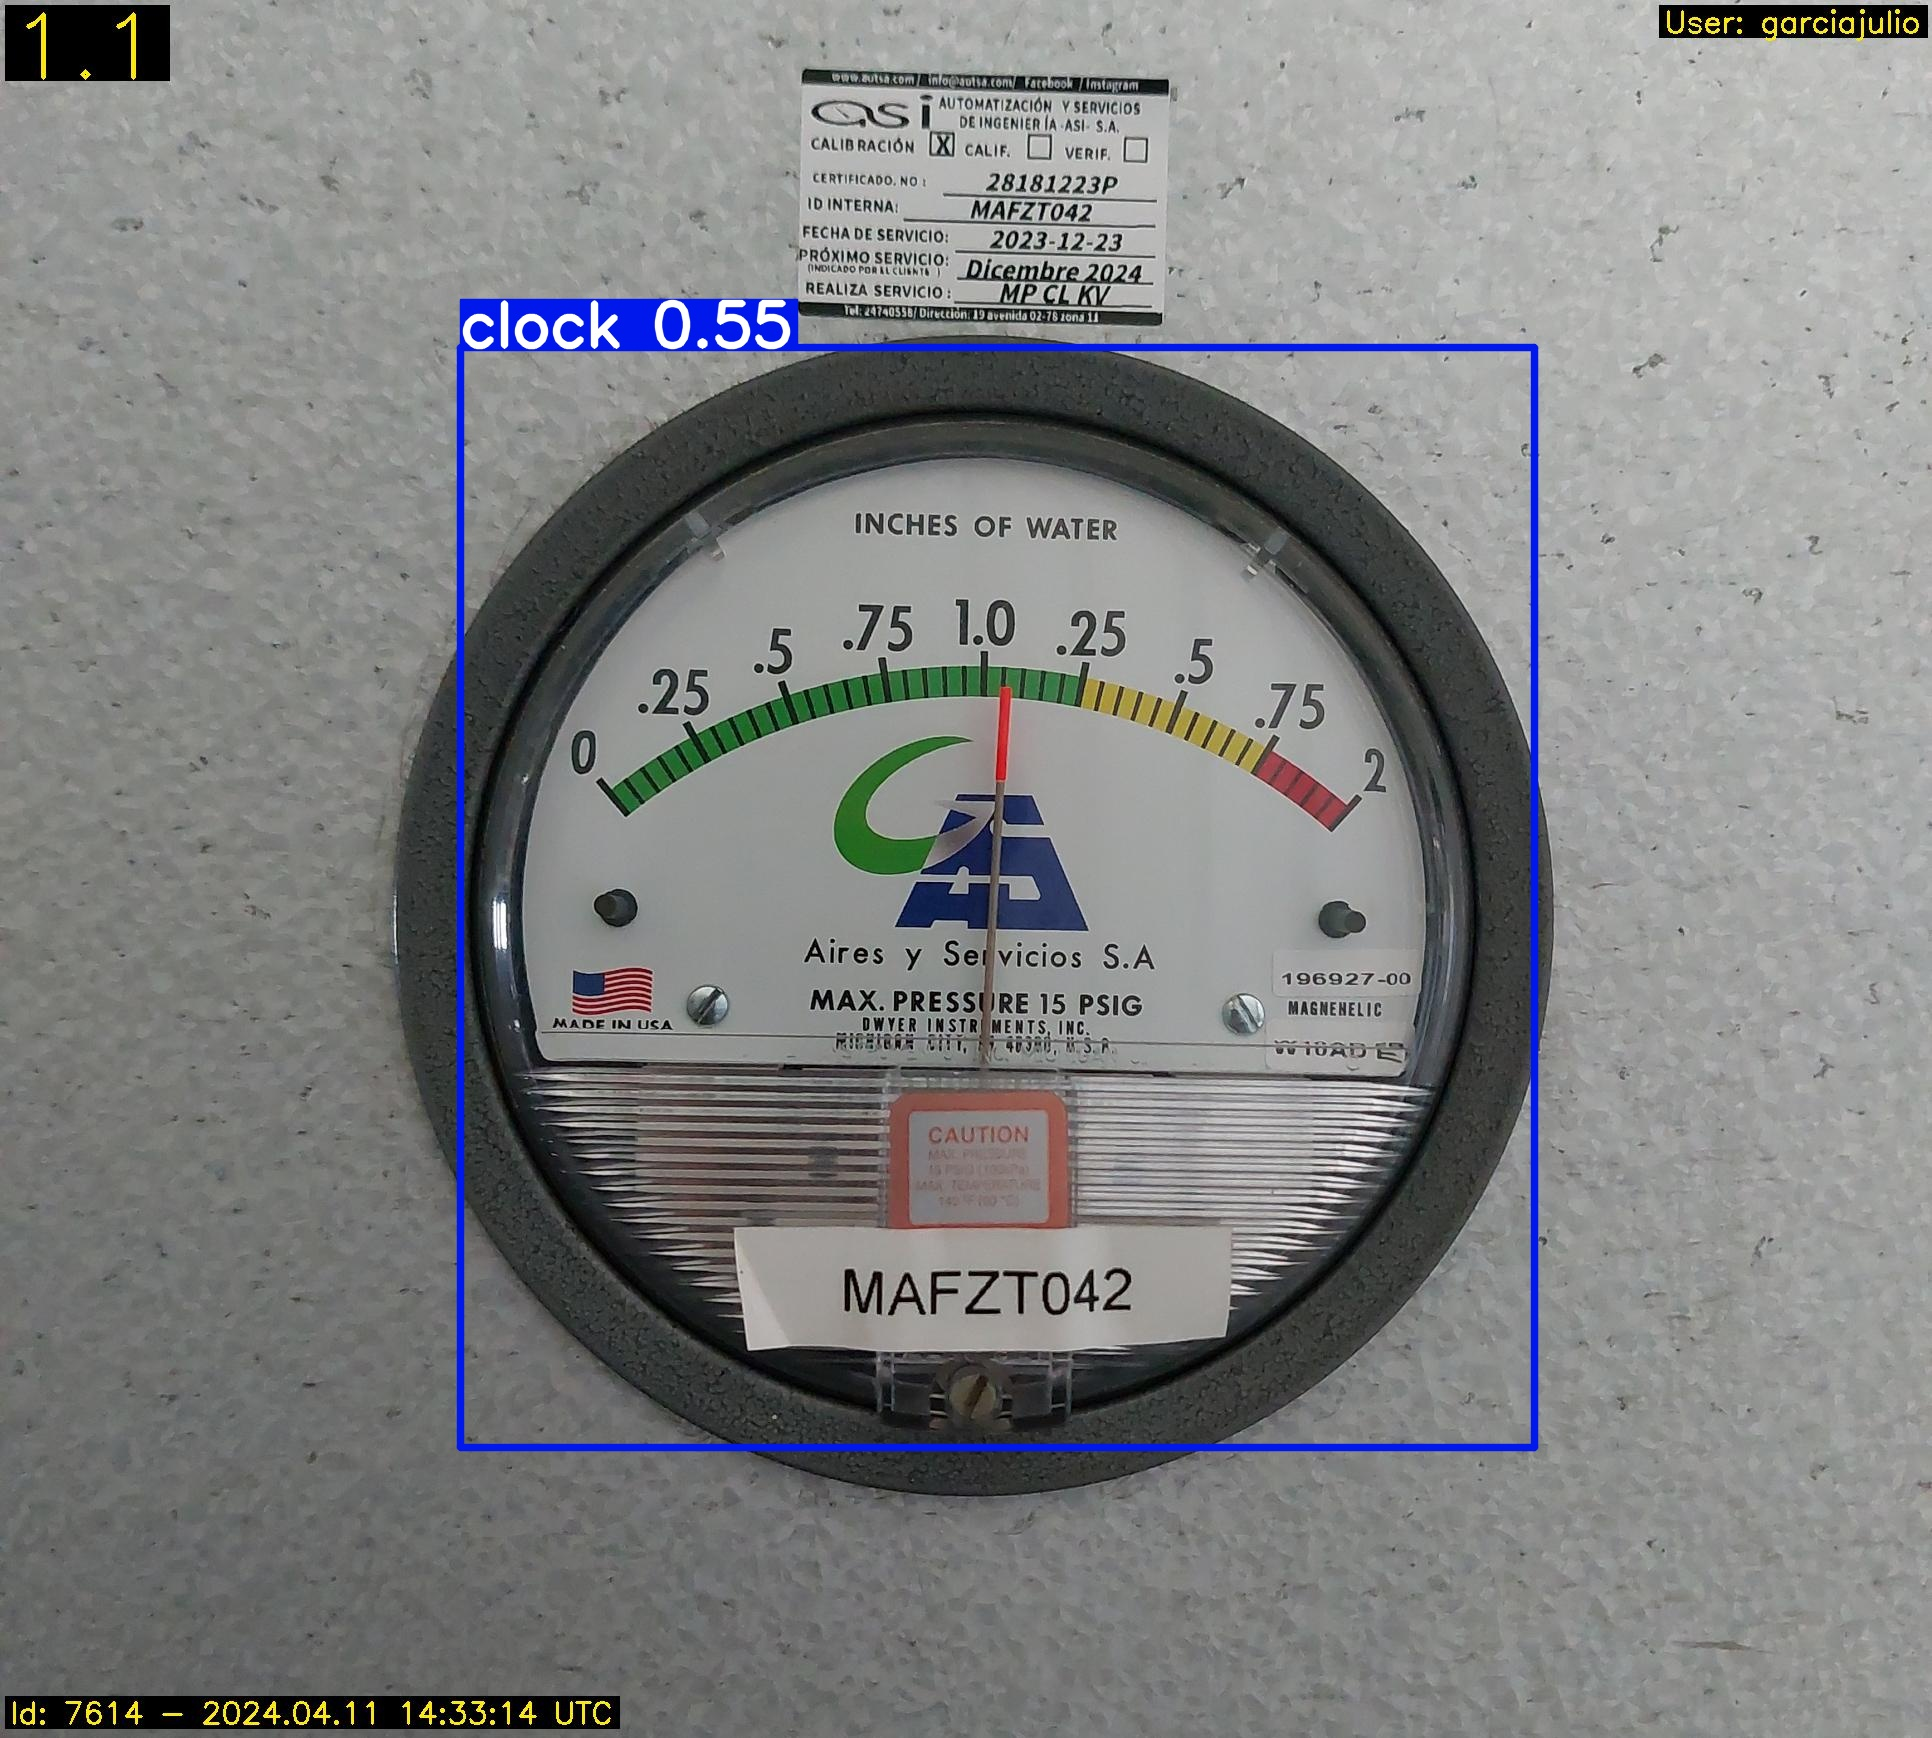

In [ ]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict/1.1_test.jpg', height=600)

# Turn Label Studio to Ultralytics


## Unpacking zip



In [ ]:
label_studio_dataset_path = "/content/project-5.zip"

# Unpack zip file
!unzip -q $label_studio_dataset_path -d "/content/data"

## Reading file names

In [ ]:
import pandas as pd
import os
import shutil
import imageio

# read all files on folder data/images
files_names = os.listdir("/content/data/images")

# removing the file extension of the files

files_names = [x.split(".jpg")[0] for x in files_names]

In [ ]:
files_names

['b59fd2b1-1966_MAFZT042_MAFZT042_1705960064_1.8',
 '8d1ba79a-1287_MAFZT042_1698778512_1.9',
 '974a836f-1685_MAFZT042_MAFZT042_1704998948_1.95',
 '43f6088b-3931_MAFZT019_MAFZT019_1709044684_0.0',
 '0b0dad97-2608_MAFZT019_MAFZT019_1706911410_9999',
 'a22bce68-4073_MAFZT019_MAFZT019_1709760925_9999',
 'ec903318-2456_MAFZT019_MAFZT019_1706735054_0.0',
 '94e52684-1939_MAFZT042_MAFZT042_1705940789_1.65',
 '8838bce6-2387_MAFSL064_MAFSL064_1706721878_7.4',
 '3cfcc1b1-1466_MAFSL064_MAFSL064_1701988357_3.4',
 '06c376fe-7371_MAFZT042_MAFZT042_2024.04.08.19.52.36_1.05']

## Spliting file names into train, test, val

In [ ]:
from sklearn.model_selection import train_test_split

# Spliting the data
def split_filenames(
    filenames,
    train_size=0.65,
    val_size=0.15,
    test_size=0.20,
    random_state=42
):
    # Ensure the proportions are correctly defined
    assert train_size + val_size + test_size == 1

    # First split to separate out the training set
    filenames_train, filenames_test_val = train_test_split(
        filenames,
        train_size=train_size,
        random_state=random_state
    )

    # Second split to separate out the validation and test sets
    relative_val_size = val_size / (val_size + test_size)  # size of validation set relative to the combined size of validation and test sets
    filenames_val, filenames_test = train_test_split(
        filenames_test_val,
        train_size=relative_val_size,
        random_state=random_state
    )

    return filenames_train, filenames_val, filenames_test

train_filenames, val_filenames, test_filenames = split_filenames(
    files_names,
    random_state=42
  )

In [ ]:
train_filenames

['974a836f-1685_MAFZT042_MAFZT042_1704998948_1.95',
 '8d1ba79a-1287_MAFZT042_1698778512_1.9',
 '8838bce6-2387_MAFSL064_MAFSL064_1706721878_7.4',
 '0b0dad97-2608_MAFZT019_MAFZT019_1706911410_9999',
 '94e52684-1939_MAFZT042_MAFZT042_1705940789_1.65',
 '43f6088b-3931_MAFZT019_MAFZT019_1709044684_0.0',
 'ec903318-2456_MAFZT019_MAFZT019_1706735054_0.0']

In [ ]:
val_filenames

['3cfcc1b1-1466_MAFSL064_MAFSL064_1701988357_3.4']

In [ ]:

test_filenames

['b59fd2b1-1966_MAFZT042_MAFZT042_1705960064_1.8',
 '06c376fe-7371_MAFZT042_MAFZT042_2024.04.08.19.52.36_1.05',
 'a22bce68-4073_MAFZT019_MAFZT019_1709760925_9999']

## Reading file labels

In [ ]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        contents = file.readlines()
    return [line.strip() for line in contents]  # remove newline characters

# usage
file_path = '/content/data/classes.txt'
class_labels = read_file(file_path)
print(class_labels)

['.25', '.5', '.75', '0', '1.0', '10', '2', '20', '30', '4', '40', '50', '6', '8', 'gauge', 'green_zone', 'needle', 'red_zone', 'yellow_zone']


## Writing yaml file

In [ ]:
!pip install pyyaml

In [ ]:
!mkdir ultralytics_data

In [ ]:

result_dataset_path = '/content/ultralytics_data'

In [ ]:
import yaml

# Define the variables
train = "../train/images"
val = "../valid/images"
test = "../test/images"
nc = len(class_labels)
names = class_labels

# Create a dictionary to hold the data
data = {
    'train': train,
    'val': val,
    'test': test,
    'nc': nc,
    'names': class_labels
}

# Write the data to a YAML file
with open(f'{result_dataset_path}/data.yaml', 'w') as outfile:
    yaml.dump(
        data,
        outfile,
        default_flow_style=False,
        encoding='utf-8'
    )

In [ ]:

environments = ['train', 'test', 'valid']
for environment in environments:
  os.makedirs(f'{result_dataset_path}/{environment}/images', exist_ok=True)
  os.makedirs(f'{result_dataset_path}/{environment}/labels', exist_ok=True)

In [ ]:
for file in train_filenames:
  shutil.copy(f"/content/data/images/{file}.jpg", "/content/ultralytics_data/train/images")
  shutil.copy(f"/content/data/labels/{file}.txt", "/content/ultralytics_data/train/labels")


In [ ]:
for file in val_filenames:
  shutil.copy(f"/content/data/images/{file}.jpg", "/content/ultralytics_data/valid/images")
  shutil.copy(f"/content/data/labels/{file}.txt", "/content/ultralytics_data/valid/labels")

In [ ]:
for file in test_filenames:
  shutil.copy(f"/content/data/images/{file}.jpg", "/content/ultralytics_data/test/images")
  shutil.copy(f"/content/data/labels/{file}.txt", "/content/ultralytics_data/test/labels")

## Zip the new formated dataset for the future

In [ ]:
%cd /content/
!zip -r ultralytics_data.zip ultralytics_data

/content
  adding: ultralytics_data/ (stored 0%)
  adding: ultralytics_data/valid/ (stored 0%)
  adding: ultralytics_data/valid/images/ (stored 0%)
  adding: ultralytics_data/valid/images/3cfcc1b1-1466_MAFSL064_MAFSL064_1701988357_3.4.jpg (deflated 1%)
  adding: ultralytics_data/valid/labels/ (stored 0%)
  adding: ultralytics_data/valid/labels/3cfcc1b1-1466_MAFSL064_MAFSL064_1701988357_3.4.txt (deflated 74%)
  adding: ultralytics_data/test/ (stored 0%)
  adding: ultralytics_data/test/images/ (stored 0%)
  adding: ultralytics_data/test/images/b59fd2b1-1966_MAFZT042_MAFZT042_1705960064_1.8.jpg (deflated 1%)
  adding: ultralytics_data/test/images/a22bce68-4073_MAFZT019_MAFZT019_1709760925_9999.jpg (deflated 0%)
  adding: ultralytics_data/test/images/06c376fe-7371_MAFZT042_MAFZT042_2024.04.08.19.52.36_1.05.jpg (deflated 1%)
  adding: ultralytics_data/test/labels/ (stored 0%)
  adding: ultralytics_data/test/labels/06c376fe-7371_MAFZT042_MAFZT042_2024.04.08.19.52.36_1.05.txt (deflated 56%)
 

/content/ultralytics_data.zip


# Unzipping already package dataset

In [ ]:
import os

In [ ]:
!unzip -q /content/ultralytics_data.zip -d /content/


# Running ultralitycs

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

https://docs.ultralytics.com/usage/cfg/#augmentation-settings

https://github.com/ultralytics/yolov5/blob/master/data/hyps/hyp.no-augmentation.yaml

In [ ]:
# Train the model with 1 GPU
results = model.train(
    data="/content/ultralytics_data/data.yaml",
    epochs=70,
  )

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/ultralytics_data/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/ultralytics_data/train/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/ultralytics_data/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      4.15G      1.386      3.449      1.239         76       1280: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all          1         10     0.0537        0.2      0.149     0.0746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      4.09G      1.499      3.593      1.291         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all          1         10      0.103        0.2      0.149     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      4.22G      1.324      3.644      1.199         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          1         10      0.103        0.2      0.149     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      4.22G      1.302      3.508      1.204         76       1280: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


                   all          1         10     0.0531        0.2      0.149     0.0796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      4.08G      1.315      3.255      1.157         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          1         10     0.0531        0.2      0.149     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      4.08G      1.264      3.592      1.174         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          1         10     0.0529        0.2      0.149      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.08G      1.358      3.617      1.255         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          1         10     0.0536        0.2      0.149     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.08G      1.348      3.402      1.231         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all          1         10     0.0545        0.2      0.149     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.08G      1.332      3.349      1.221         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all          1         10     0.0545        0.2      0.149     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.08G      1.321      3.292      1.251         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]

                   all          1         10     0.0542        0.2      0.149     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.08G      1.395      3.478      1.283         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.68it/s]

                   all          1         10     0.0538        0.2      0.149     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.08G      1.325      3.249      1.303         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all          1         10     0.0538        0.2      0.133     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.08G      1.339      3.201      1.226         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]

                   all          1         10     0.0536        0.2      0.133     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.08G      1.263      3.219       1.14         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.87it/s]

                   all          1         10     0.0533        0.2      0.133     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.08G      1.274      2.914      1.208         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          1         10     0.0536        0.2      0.133      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.08G      1.274       3.21      1.234         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all          1         10     0.0367        0.2      0.133     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.08G      1.306      3.229      1.184         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          1         10     0.0368        0.2      0.133     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.08G      1.226      2.991       1.18         75       1280: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          1         10     0.0368        0.2      0.133     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      4.08G      1.323      3.306      1.223         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          1         10     0.0368        0.2      0.133     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.08G      1.151      2.948      1.187         75       1280: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          1         10     0.0368        0.2      0.133     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.08G      1.188      2.777       1.15         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.69it/s]

                   all          1         10     0.0364        0.2      0.133     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.08G      1.286      3.057      1.271         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all          1         10     0.0364        0.2      0.133     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.08G      1.233      2.762      1.229         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all          1         10     0.0198        0.2      0.149     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      4.08G      1.325      3.175      1.211         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


                   all          1         10     0.0198        0.2      0.149     0.0514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.08G      1.197      2.632      1.156         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all          1         10     0.0193        0.2      0.149     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      4.08G      1.281      2.917      1.213         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          1         10     0.0193        0.2      0.149     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.08G      1.166      2.974      1.191         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          1         10     0.0154        0.3      0.153     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.08G      1.173      2.597      1.189         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.71it/s]

                   all          1         10     0.0154        0.3      0.153     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.08G       1.21      2.644      1.187         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.23it/s]

                   all          1         10     0.0135        0.3      0.153     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      4.08G       1.19      2.667      1.153         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          1         10     0.0135        0.3      0.153     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.08G      1.196      2.727       1.22         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]

                   all          1         10     0.0113        0.3      0.154     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.08G      1.103      2.459      1.129         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

                   all          1         10     0.0113        0.3      0.154     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      4.08G      1.278      2.647      1.211         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all          1         10     0.0112        0.3      0.203     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.08G      1.223      2.735      1.217         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.12it/s]

                   all          1         10     0.0112        0.3      0.203     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.08G      1.201      2.592       1.18         75       1280: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all          1         10     0.0108        0.3      0.203     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      4.08G      1.105      2.427      1.128         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          1         10     0.0108        0.3      0.203     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.08G      1.126       2.38      1.177         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          1         10    0.00952        0.3      0.203      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.08G      1.087      2.279      1.158         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          1         10    0.00952        0.3      0.203      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.08G      1.092      2.323      1.139         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all          1         10    0.00875        0.3      0.203     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.08G      1.084      2.166      1.121         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all          1         10    0.00875        0.3      0.203     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.08G      1.193      2.383       1.14         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all          1         10     0.0101        0.3      0.205      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.08G      1.141      2.298       1.19         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all          1         10     0.0101        0.3      0.205      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.08G      1.227      2.524      1.212         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          1         10    0.00917        0.3      0.205     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.08G      1.142      2.348      1.164         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          1         10    0.00917        0.3      0.205     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.08G      1.076      2.187      1.109         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all          1         10    0.00873        0.3      0.208      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.08G      1.012      2.051      1.085         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]


                   all          1         10    0.00873        0.3      0.208      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.08G       1.13      2.364      1.152         75       1280: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all          1         10    0.00851        0.3      0.211     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.08G      1.088      2.217      1.111         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          1         10    0.00851        0.3      0.211     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.08G      1.095      2.255      1.122         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


                   all          1         10    0.00827        0.3      0.213     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      4.08G      1.067      2.221      1.131         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          1         10    0.00827        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      4.08G      1.141      2.408      1.163         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all          1         10    0.00753        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      4.08G      1.141      2.214      1.121         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


                   all          1         10    0.00753        0.3      0.213     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.08G      1.149      2.356      1.156         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


                   all          1         10    0.00753        0.3      0.213     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      4.08G      1.131      2.146      1.087         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


                   all          1         10     0.0072        0.3      0.213     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      4.08G       1.12      2.389      1.097         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          1         10     0.0072        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      4.08G      1.253      2.547      1.218         76       1280: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all          1         10     0.0072        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      4.08G      1.059      1.991      1.046         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          1         10    0.00726        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      4.08G      1.074      2.296      1.146         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


                   all          1         10    0.00726        0.3      0.213     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      4.08G      1.068      2.123      1.116         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.79it/s]

                   all          1         10    0.00726        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      4.08G     0.9867      2.145       1.07         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          1         10    0.00766        0.3      0.213     0.0512


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      4.08G        1.1      2.136      1.135         76       1280: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          1         10    0.00766        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      4.22G      1.084      2.229      1.163         76       1280: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          1         10    0.00766        0.3      0.213     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      4.22G       1.02      2.199      1.052         76       1280: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          1         10    0.00771        0.3      0.211     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      4.22G      1.013      2.105      1.109         76       1280: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          1         10    0.00771        0.3      0.211     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      4.08G      1.045      2.215      1.054         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


                   all          1         10    0.00771        0.3      0.211     0.0609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      4.08G       1.08      2.203      1.061         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]

                   all          1         10    0.00779        0.3      0.213     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      4.08G      1.023          2      1.083         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all          1         10    0.00779        0.3      0.213     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      4.08G      1.054       2.01      1.121         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all          1         10    0.00779        0.3      0.213     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      4.08G     0.9817      1.979       1.09         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          1         10    0.00765        0.3      0.213     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      4.08G      1.084      2.096      1.139         76       1280: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all          1         10    0.00765        0.3      0.213     0.0611



70 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 6.4MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.04it/s]


                   all          1         10     0.0531        0.2      0.149     0.0796
                     0          1          1          0          0          0          0
                     2          1          1          0          0          0          0
                     4          1          1          0          0          0          0
                     6          1          1          0          0          0          0
                     8          1          1          0          0          0          0
                 gauge          1          1     0.0312          1      0.497      0.298
            green_zone          1          1          0          0          0          0
                needle          1          1          0          0          0          0
              red_zone          1          1        0.5          1      0.995      0.497
           yellow_zone          1          1          0          0          0          0
Speed: 0.8ms preproce

### Nuevas acciones

Limpiar el dataset para que las imagenes tengan el mismo tamaño de ancho y alto

https://github.com/ultralytics/yolov5/blob/master/data/hyps/hyp.no-augmentation.yaml


In [ ]:
# results

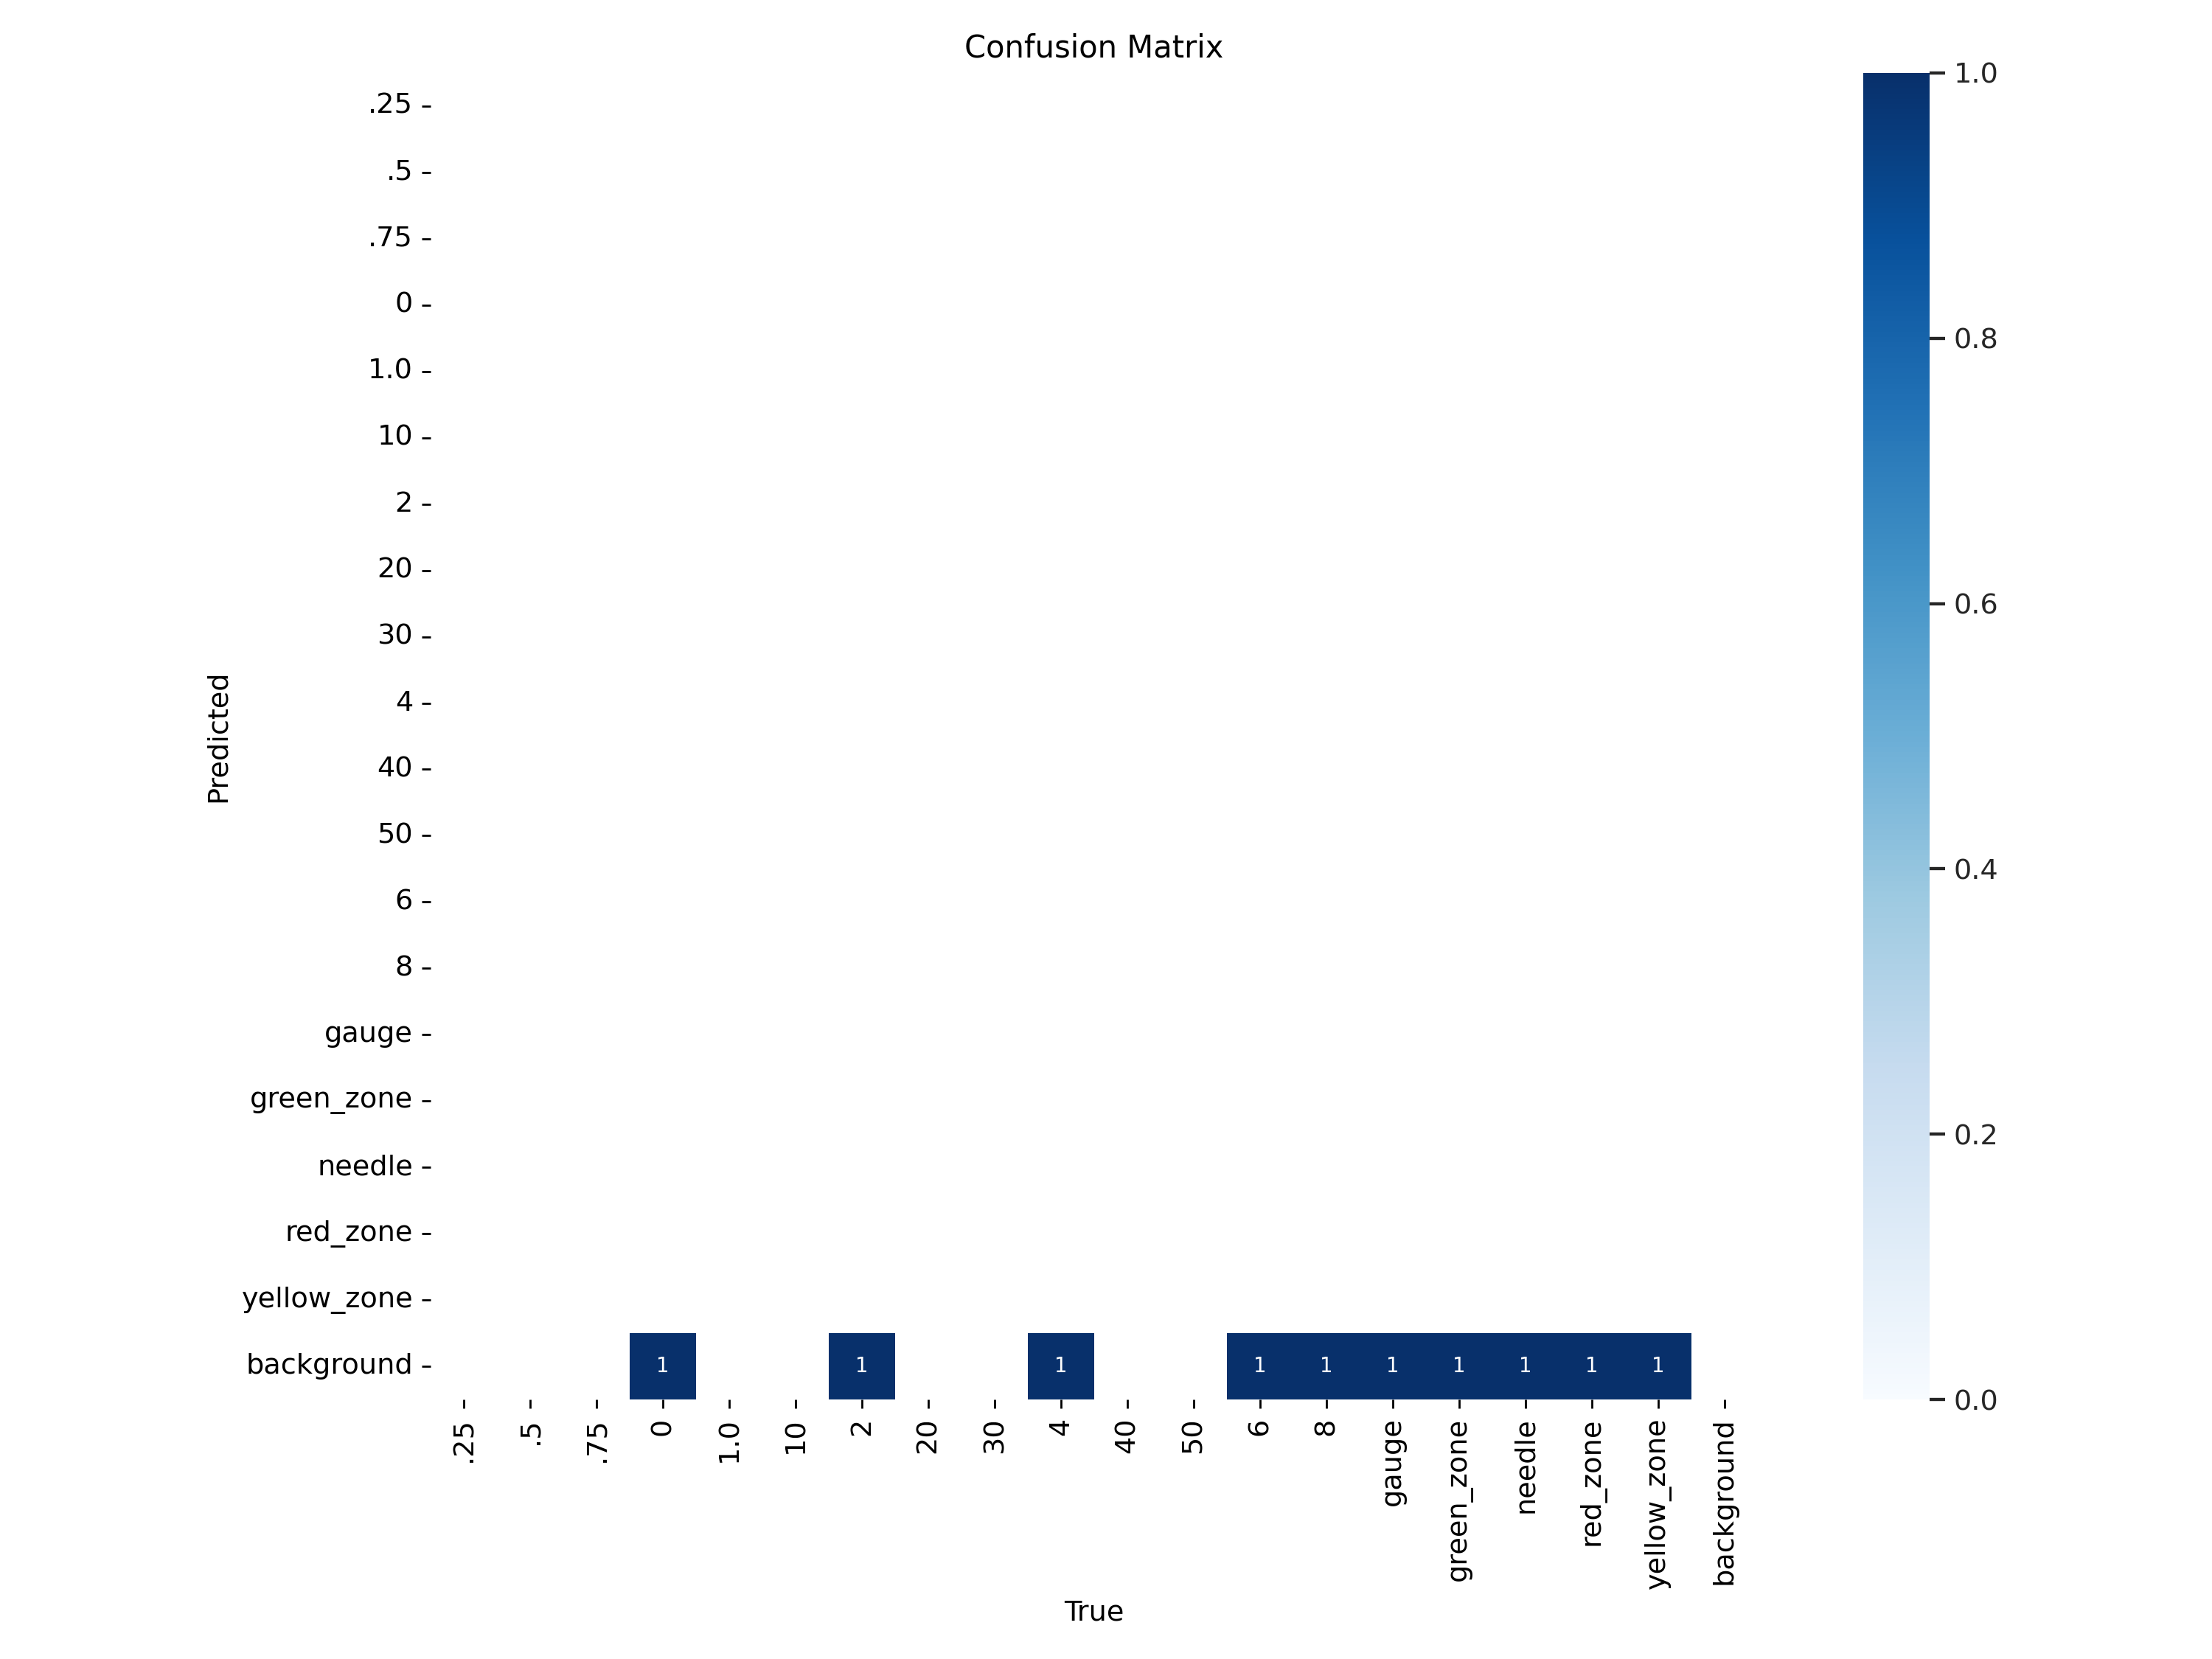

In [ ]:
# from PIL import Image
from IPython.display import Image as ShowImage
ShowImage(filename='/content/runs/detect/train22/confusion_matrix.png')

In [ ]:
new_model = YOLO('/content/runs/detect/train2/weights/best.pt')

In [ ]:
from PIL import Image
img_raw_path = '/content/overfit.jpg'

# turn image in an image of 640x640



# Open an image file
img = Image.open(img_raw_path)

# Resize the image
new_width = 640
new_height = 640

# Resize the image
img_resized = img.resize((new_width, new_height))
# Save the resized image
img_resized.save('output.jpg')

In [ ]:
new_results = new_model.predict(source='/content/overfit.jpg')


image 1/1 /content/overfit.jpg: 1152x1280 (no detections), 19.4ms
Speed: 11.3ms preprocess, 19.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1152, 1280)


In [ ]:
new_results[0].show()

In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True \
model=/content/runs/detect/train/weights/best.pt \
source=/content/output.jpg

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968